In [333]:
from pathlib import Path
import hvplot.pandas
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

## Feed Data into SQL and load using DB

In [334]:
# Load the dataset
data = Path('./Resources/diamonds.csv')
df = pd.read_csv(data)
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [335]:
# Remove the 'Unnamed: 0' column
df = df.drop('Unnamed: 0', axis=1)

## Exploratory Data Analysis

In [336]:
# Exploratory Data Analysis (EDA)
print("Dataset shape:", df.shape)

Dataset shape: (53940, 10)


In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [338]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [339]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [340]:
#Print unique categorical values in the dataset
print(df.cut.unique())
print(df.color.unique())
print(df.clarity.unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [341]:
print(df.cut.value_counts())
print(df.color.value_counts())
print(df.clarity.value_counts())

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64


## Data PreProcessing

## Data Cleaning

In [342]:
#Dropping Zero values in the dataset
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)

In [343]:
df.shape
## Observation: Dropped 20 rows after deleting null values

(53920, 10)

In [344]:
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


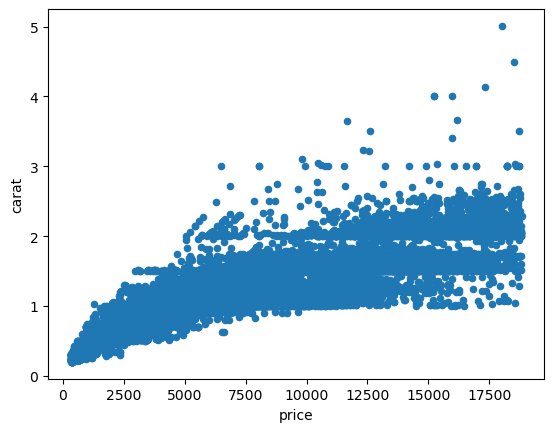

In [345]:
df.plot.scatter('price', 'carat')
plt.show()

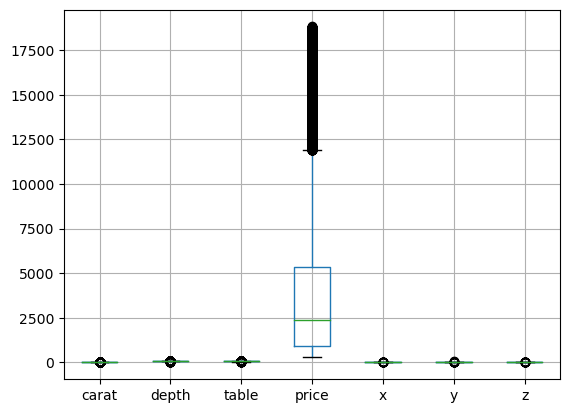

In [346]:
import matplotlib.pyplot as plt
df.boxplot()
plt.show()

In [347]:
#Verifying the dataset has no null or N/A values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## Data Quality check

<AxesSubplot:>

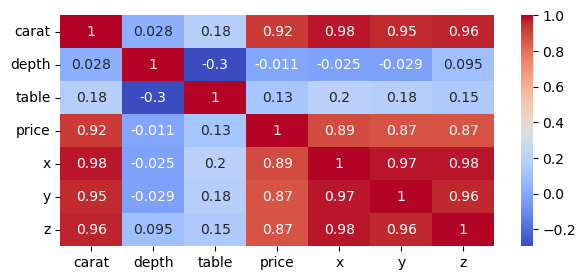

In [348]:
import seaborn as sns
corr = df.corr()
plt.figure(figsize = (7,3))
sns.heatmap(df.corr(),annot = True , cmap = 'coolwarm' )


In [349]:
##Observation: Carat and Price is very strongly correlation. x, y, z is strongly related to Price & depth is not strongly relation

In [350]:
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [351]:
# df.price = np.log10(df.price)

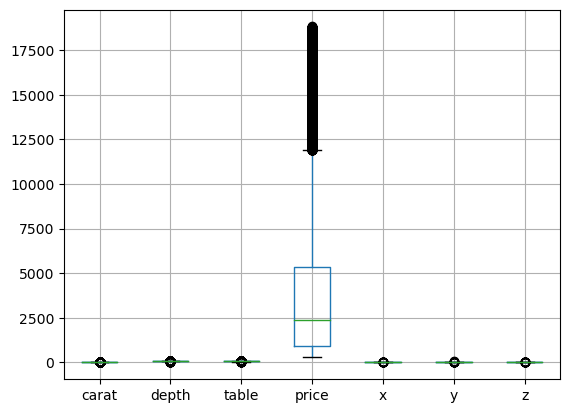

In [352]:
# times = [96,98,100,105,85,88,95,100,101,102,97,98,5]
# fig1, ax1 = plt.subplots()
# ax1.set_title('Reaction Times at Baseball Batting Cage')
# ax1.set_ylabel('Reaction Time (ms)')
# ax1.boxplot(times)
# plt.show()
df.boxplot()
plt.show()

In [353]:
df.shape

(53920, 10)

In [354]:
## Dataset including outliers
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [355]:
## Drop Outliers from the Dataset
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest

numeric_cols = df.select_dtypes (include=np.number).columns.tolist()

outlier_detector = IsolationForest(contamination='auto', random_state=42)
df['outlier_label'] = outlier_detector.fit_predict(df[numeric_cols])

df = df[df['outlier_label'] != -1]

df_new = df.drop('outlier_label', axis = 1)

print (df_new)


       carat        cut color clarity  depth  table  price     x     y     z
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
13      0.31      Ideal     J     SI2   62.2   54.0    344  4.35  4.37  2.71
15      0.32    Premium     E      I1   60.9   58.0    345  4.38  4.42  2.68
16      0.30      Ideal     I     SI2   62.0   54.0    348  4.31  4.34  2.68
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[45219 rows x 10 columns]


In [356]:
df_new.describe()

,carat,depth,table,price,x,y,z
count,45219.000000,45219.000000,45219.000000,45219.000000,45219.000000,45219.000000,45219.000000
mean,0.696015,61.809735,57.225363,2996.291183,5.535787,5.540324,3.423045
std,0.335746,1.161851,1.967068,2550.023679,0.905908,0.901181,0.561952
min,0.260000,43.000000,43.000000,334.000000,4.120000,4.120000,2.540000
25%,0.390000,61.200000,56.000000,928.000000,4.690000,4.700000,2.890000
50%,0.610000,61.900000,57.000000,2086.000000,5.480000,5.490000,3.380000
75%,1.010000,62.500000,59.000000,4455.000000,6.380000,6.380000,3.950000
max,1.650000,66.500000,66.000000,14982.000000,7.580000,7.620000,4.680000


In [357]:
df_new.shape

(45219, 10)

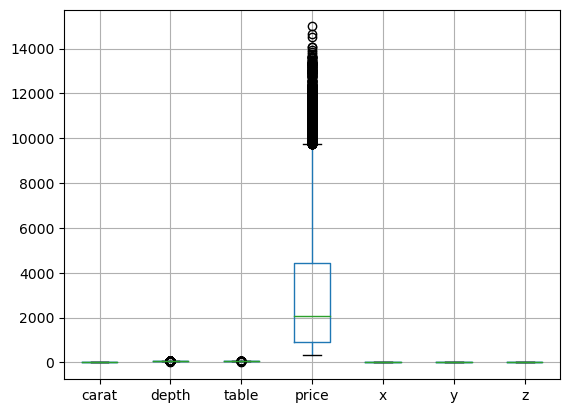

In [358]:
df_new.boxplot()
plt.show()

In [359]:
# for col in df.columns:
#     if col in ('cut', 'color', 'clarity'):
#         continue
#     df[col] = df[col] / df[col].max()

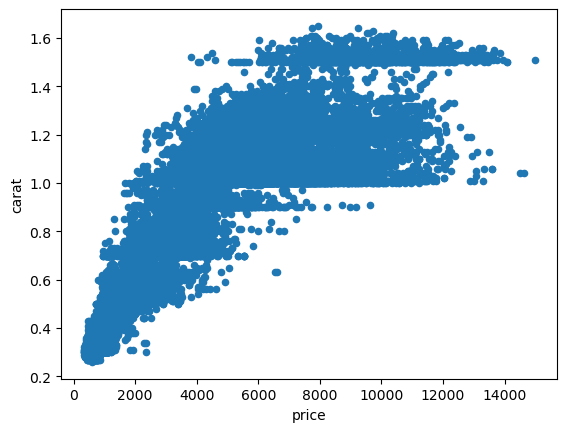

In [360]:
df_new.plot.scatter('price', 'carat')
plt.show()

## One Label Encoding technique to represent categorical variables as numerical values in a ML model

In [361]:
from sklearn.preprocessing import LabelEncoder

def convert_catg(df):
    
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    object_cols = list(df.select_dtypes(exclude=[np.number]).columns)
    object_cols_ind = []
    for col in object_cols:
        object_cols_ind.append(df.columns.get_loc(col))
        for i in object_cols_ind:
            df.iloc[:,i] = le.fit_transform(df.iloc[:,i])
        

In [362]:
convert_catg(df_new)
print(df_new.head())
len(df)

    carat  cut  color  clarity  depth  table  price     x     y     z
3    0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.63
4    0.31    1      6        3   63.3   58.0    335  4.34  4.35  2.75
13   0.31    2      6        3   62.2   54.0    344  4.35  4.37  2.71
15   0.32    3      1        0   60.9   58.0    345  4.38  4.42  2.68
16   0.30    2      5        3   62.0   54.0    348  4.31  4.34  2.68


45219

In [363]:
y = df_new ['price']
X = df_new.drop(columns=['price'])
X.head(), y.head()

(    carat  cut  color  clarity  depth  table     x     y     z
 3    0.29    3      5        5   62.4   58.0  4.20  4.23  2.63
 4    0.31    1      6        3   63.3   58.0  4.34  4.35  2.75
 13   0.31    2      6        3   62.2   54.0  4.35  4.37  2.71
 15   0.32    3      1        0   60.9   58.0  4.38  4.42  2.68
 16   0.30    2      5        3   62.0   54.0  4.31  4.34  2.68,
 3     334
 4     335
 13    344
 15    345
 16    348
 Name: price, dtype: int64)

## Training and Testing

In [364]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y,train_size=0.8,random_state=42)

In [365]:
assert len(X_train) + len(X_test) == len(df_new)
print(len(X_train), len(X_test), len(df_new))

assert len(y_train) + len(y_test) == len(df)
print(len(y_train), len(y_test), len(df))

36175 9044 45219
36175 9044 45219


Scalar testing only required for linear models. Doesn't make any difference for tree based methods.
Leaving it in, incase there are points for this step.

In [366]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform (X_train)
X_test = scaler.transform (X_test)

#Feature Importances
#Based on Random Feature Importances, mathematically the most important variables that influence the price of a diamond are Carat (weight) & Clarity

# Random Forest Regressor

In [367]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=250)
# rf = rf.fit(X=df.drop(columns=['price', 'x', 'y', 'z']), y=df.price)

#Determine R-squared(R2) to measure performance
rf.fit(X_train, y_train)
pred2 = rf.predict(X_test)

In [368]:
# help(RandomForestRegressor)

In [369]:
from sklearn.metrics import r2_score, mean_squared_error

rf_regressor = r2_score(y_test, pred2)*100
mse = mean_squared_error(y_test, pred2)
print (rf_regressor)
print ("The r2 value of Random forest Regressor is:", rf_regressor)
print(f'The rmse of Random Forest Regressor is: {round(mse**.5, 2)}')

98.19670613220453
The r2 value of Random forest Regressor is: 98.19670613220453
The rmse of Random Forest Regressor is: 343.46


<AxesSubplot:ylabel='Density'>

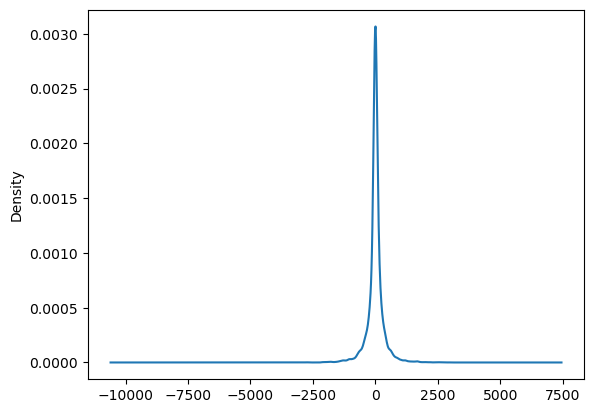

In [370]:
new_pred_test = pd.DataFrame(y_test)
new_pred_test['pred'] = pred2
# new_pred_test.head()
new_pred_test['error'] = new_pred_test['pred'] - new_pred_test['price']
new_pred_test['error'].plot.kde()

In [ ]:
#Using Kernel Density method for visualizing the Error distribution of observations in a dataset

<AxesSubplot:ylabel='Density'>

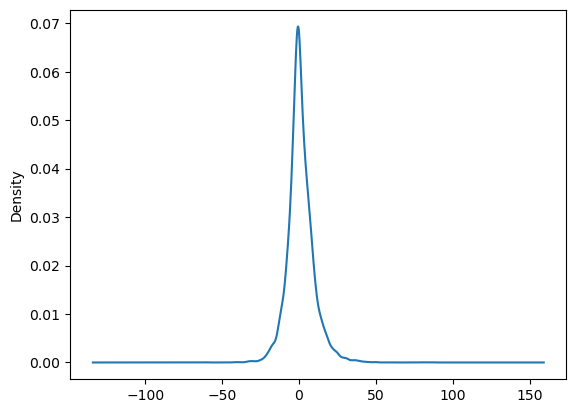

In [371]:
new_pred_test['error_pct'] = (new_pred_test['error'] / new_pred_test['price'] * 100).round(2)
new_pred_test['error_pct'].plot.kde()

<AxesSubplot:xlabel='1'>

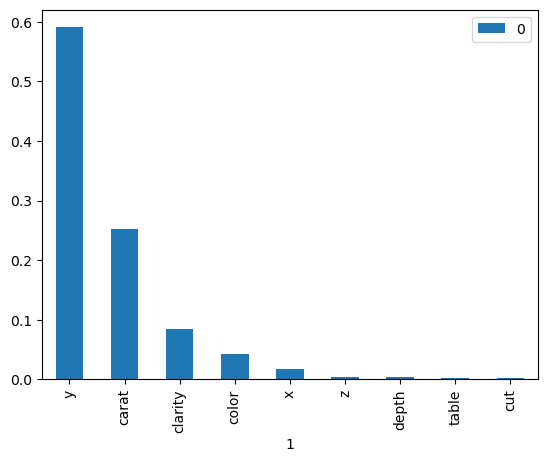

In [372]:
feature_imp_df = pd.DataFrame(sorted(zip(rf.feature_importances_, X.columns), reverse=True)).set_index(1)
feature_imp_df.plot.bar()